In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel("Retail.xls")
print(data.head(3))

   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298  CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341   IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330   IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   

   Customer Name    Segment           City            State  ...  \
0    Rick Hansen   Consumer  New York City         New York  ...   
1  Justin Ritter  Corporate     Wollongong  New South Wales  ...   
2   Craig Reiter   Consumer       Brisbane       Queensland  ...   

        Product ID    Category Sub-Category  \
0  TEC-AC-10003033  Technology  Accessories   
1  FUR-CH-10003950   Furniture       Chairs   
2  TEC-PH-10004664  Technology       Phones   

                                        Product Name     Sales Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1          Novimex Executive Leather Armchair, Black  3709.395        9   
2   

In [22]:
print(data.dtypes)
print(type(data))

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object
<class 'pandas.core.frame.DataFrame'>


In order to analyze the data that we can find in the Excel, I will use a top-down approach, starting with a general vision of the whole world and then highlightingand getting more specific details of the data. 

During this case of study, I will provide an explanation of the most important things I see in the different plots.


I will start taking a look at the profit that the business obtains from the different countries. In this plot, we can see that the company is present in almost every country of the world. Some of these countries are not profitable, for example Turkey and Nigeria and Africa and Latin America, seem to obtain mixed result.

Germany, France, United Kingdom, India and China  are profitable markets, however, the most important market for this business seems to be the USA.




In [23]:
profit=pd.DataFrame(data.groupby("Country").sum()["Profit"])
print(profit)


                  Profit
Country                 
Afghanistan   5460.30000
Albania        709.32000
Algeria       9106.50000
Angola        6494.97000
Argentina   -18693.79672
...                  ...
Venezuela   -11222.71044
Vietnam      -1870.23060
Yemen        -3706.45800
Zambia        7001.73000
Zimbabwe     -5428.78500

[147 rows x 1 columns]


In [24]:
Country=profit.index.tolist()
print(Country)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia', 'Madagascar', 'Malaysia', 'Mali', 'Martinique', 'Mauritania', 'M

In [25]:
profit["Country"]=Country
profit=profit.sort_values("Profit",ascending=False)
print(profit)

                     Profit         Country
Country                                    
United States   286397.0217   United States
China           150683.0850           China
India           129071.8350           India
United Kingdom  111900.1500  United Kingdom
France          109029.0030          France
...                     ...             ...
Pakistan        -22446.6480        Pakistan
Honduras        -29482.3714        Honduras
Netherlands     -41070.0750     Netherlands
Nigeria         -80750.7180         Nigeria
Turkey          -98447.2320          Turkey

[147 rows x 2 columns]


In [26]:
profit2=pd.concat([profit.head(),profit.tail()])

print(profit2.columns)

Index(['Profit', 'Country'], dtype='object')


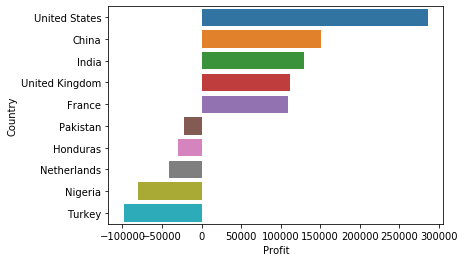

In [27]:
sns.barplot(profit2["Profit"],profit2["Country"])
plt.show()

Considering the sales that this business has, we can confirm that the USA holds the largest number of sales and so, it is the most important market for this business.

Before focusing this study on the USA, I would like to understand better the shipping costs of the company, because considering that it is a global business this is one of the most important variables for its success.

                   Sales
Country                 
Afghanistan  21673.32000
Albania       3888.12000
Algeria      36091.59000
Angola       25554.00000
Argentina    57511.78328
...                  ...
Venezuela    26587.82956
Vietnam      65800.19940
Yemen         2465.71200
Zambia       26035.50000
Zimbabwe      3765.10500

[147 rows x 1 columns]
                          Sales            Country
Country                                           
United States      2.297201e+06      United States
Australia          9.252359e+05          Australia
France             8.589311e+05             France
China              7.005620e+05              China
Germany            6.288400e+05            Germany
...                         ...                ...
Tajikistan         2.427840e+02         Tajikistan
Macedonia          2.096400e+02          Macedonia
Eritrea            1.877400e+02            Eritrea
Armenia            1.567500e+02            Armenia
Equatorial Guinea  1.505100e+02  Equato

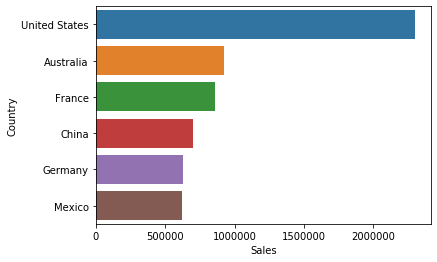

In [28]:
sales=pd.DataFrame(data.groupby("Country").sum()["Sales"])
print(sales)
Country=sales.index.tolist()
sales["Country"]=Country
sales=sales.sort_values("Sales",ascending=False)
print(sales)
sales2=sales.head(6)

sns.barplot(sales2.Sales,sales2.Country)
plt.show()

We will start the analysis of this graphic by highlighting that this business has 3 classes of products, “Furniture”, “Office Supplies” and “Technology”.

If we plot the Sales in the X-axis and the shipping costs in the Y-axis and separate the products by category, we can find a very interesting information.

Obviously, the costs of shipping increase with the sales, just because if we sell more, we have to send more products, which generate more shipping costs.

The most important information that we can obtain from this plot is that, the variance that the “Furniture” and “Office Supplies” show on the X-axis is notoriously lower than the variance of the “Technology” products. It is important, because it let us know that on average, to ship “Furniture” and “Office Supplies” is more costly than shipping “Technology” products.

This leads me to think that the “Furniture” and “Office Supplies” products should be big and bulky and that, overthought in the “Technology” category there are also some products with high shipping costs, some products in this category are lighter.

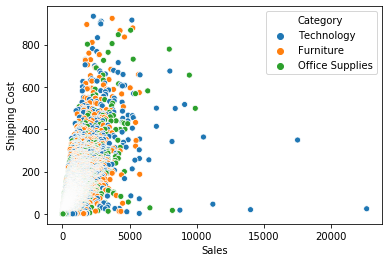

In [29]:
sns.scatterplot(data.Sales,data['Shipping Cost'],hue=data.Category)
plt.show()

We will continue taking a look at the different Sub-categories that this business has.

Thanks to this plot, we can confirm what I suspected in the previous graphic. On one had in the “Furniture” category, we can find Bookcases, Chairs and Tables and in the “Office Supplies” category, we can mainly see Art and Appliances, all these products are quite big and difficult to ship, as thus, costly. On the other hand, in the “Technology” category there is a range of products, from heavy ones, like machines, to light ones, like phones or accessories.

The most important thing to see in this graphic is that I plotted the categories in the X-axis and the Profit in the Y-axis and thanks to that we can see that this business obtains profits from a good part of the sells, but for almost half of the sells this company do it looses money. 

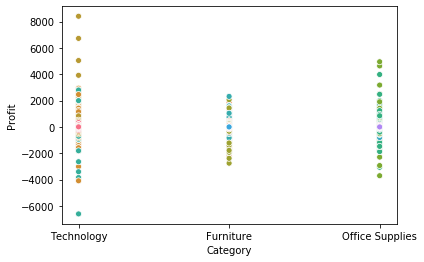

In [30]:
sns.scatterplot(data.Category,data.Profit,hue=data["Sub-Category"],legend=False)
plt.show()

If we take a closer look to the products that produce the greatest negative profit, -2000 $ or less, we can find furniture like “tables” and “chairs” or Office supplies such as “Binders” and “Appliances”. However, the most important negative  profit, come from the technology category with products like Machines and Phones. Let’s see if it is profitable for this business to even sell them.

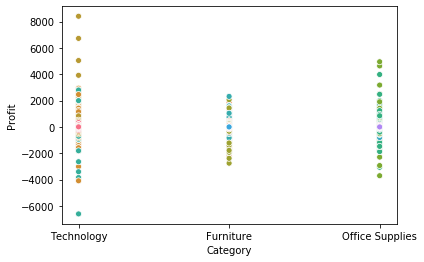

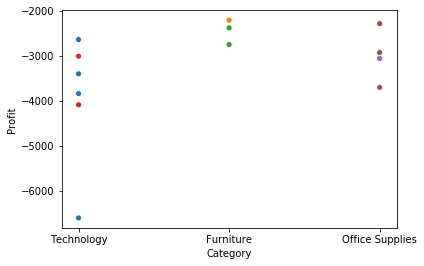

In [31]:
sns.scatterplot(data.Category,data.Profit,hue=data["Sub-Category"],legend=False)
plt.show()
data2=data[data.Profit<-2000]

sns.scatterplot(data2.Category,data2.Profit,hue=data2["Sub-Category"],legend=False)
plt.show()

As we can see, the sub-category “tables” is generating a huge negative profit and, at the same time, as we have seen before, since it’s a Furniture subcategory, its shipping costs are high. We should consider if it is possible to eliminate this sub-category satisfying the demand of this sub-category with a substitutive product.

Another conclusion that we can take out of this chart is that the product “Machines” seems to be profitable enough to justify the looses that we have
selling a certain “Machines” that have a huge negative profit. Maybe, instead of deleting this whole Sub-category, we can search for which “Machines” are making the business to lose profit and to think whether to keep them or delete them. 

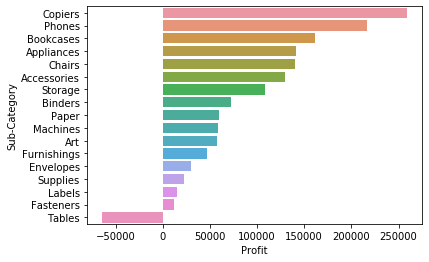

In [32]:
data_sub=pd.DataFrame(data.groupby("Sub-Category").sum()["Profit"])
Sub=data_sub.index.tolist()
data_sub["Sub-Category"]=Sub
data_sub=data_sub.sort_values("Profit",ascending=False)

sns.barplot(data_sub.Profit,data_sub["Sub-Category"])
plt.show()

Now, we will search for the machines that have a negative impact in the profit of this business

As we can see in the following dataframe, these non-profitable machines are: 
Cubify CubeX 3D Printer Triple Head Print,
Cubify CubeX 3D Printer Double Head Print,
Cubify CubeX 3D Printer Double Head Print,
Lexmark MX611dhe Monochrome Laser Printer.

Considering that out of these 4 machines, 3 are "Cubify CubeX 3D", we will continue our analysis, examining the profit that we obtain from this line of products. 

In [33]:
data[(data["Sub-Category"]=="Machines") & (data.Profit<-2000)]["Product Name"]

37      Cubify CubeX 3D Printer Triple Head Print
171     Cubify CubeX 3D Printer Double Head Print
859     Cubify CubeX 3D Printer Double Head Print
2347    Lexmark MX611dhe Monochrome Laser Printer
Name: Product Name, dtype: object

Now we will search how many products of this line the business has and their profit.

As we can see in the following dataframe, there are just 4 products of this line, 3 of them are non-profitable, and just one is, however, its margin is too low.

The business should seriously consider if is worth it to keep selling this line of products. 

In [34]:
data[data["Product Name"].str.contains("Cubify CubeX 3D")][["Product Name","Profit"]]


,Product Name,Profit
37,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
171,Cubify CubeX 3D Printer Double Head Print,-6599.9780
859,Cubify CubeX 3D Printer Double Head Print,-2639.9912
22238,Cubify CubeX 3D Printer Double Head Print,359.9988


If we check the information that we have of these products we find that all of them have been sold in the USA and that the only one that is profitable is from the west part of the USA. 

In [35]:
data[data["Product Name"].str.contains("Cubify CubeX 3D")]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
37,31980,US-2014-168116,2014-11-05,2014-11-05,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,North Carolina,...,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,674.82,High
171,39069,CA-2013-108196,2013-11-26,2013-12-03,Standard Class,CS-12505,Cindy Stewart,Consumer,Lancaster,Ohio,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,451.63,Low
859,34448,CA-2012-147830,2012-12-15,2012-12-18,First Class,NF-18385,Natalie Fritzler,Consumer,Newark,Ohio,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912,219.62,High
22238,35515,CA-2014-149881,2014-04-02,2014-04-04,First Class,NC-18535,Nick Crebassa,Corporate,San Francisco,California,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4799.984,2,0.2,359.9988,10.34,Medium


We will continue this exercice, analyzing the variance that exist between the different parts of the USA.

As we can see in the following boxplot, even though the median of profit in the West part of the USA is higher than the median in other parts, it is not a relevant difference.

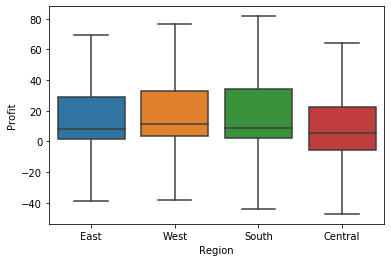

In [36]:
data_USA=data[data.Market=="US"]

sns.boxplot(data_USA.Region,data_USA.Profit,showfliers=False)
plt.show()

One of the most interesting things that we can see with this USA sub-dataset that I created is that the “Ordering priority” that this business uses in this territory, are mainly "Medium" and "High".

It is especially important if we consider the big proportion of "High" and "Medium" Order priorities that are used for the East and West parts of the country. 

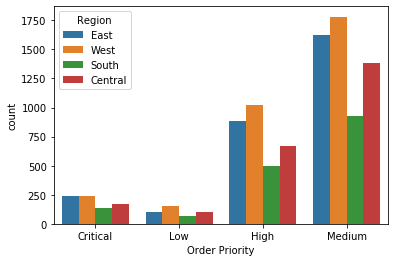

In [37]:
sns.countplot(data_USA["Order Priority"],hue=data_USA.Region)


Now I will analyze how the "Order Priority" is affected by the "Category" of the sent products.

In the following table, we will see how the percentage of the different “order priorities” is distributed between the different categories of products. 

For example, it is possible to see that the 20% of the “Critical order priorities” that the business sends are used for “Furniture” products, 60% for “Office Supplies” and 19% for “Technology”.

It is interesting to notice that in every case, the 60% of every Order priority is used to send Office supplies.

In order to understand better this data, we will use a barplot to see if this percentage can be explained by the quantity of Office supplies products.

In [38]:
cross=pd.crosstab(data_USA["Order Priority"], data_USA['Category'], rownames = ['Order Priority'], colnames = ['Category'],margins=True)
print(cross/cross.iloc[-1,-1])

Category        Furniture  Office Supplies  Technology       All
Order Priority                                                  
Critical         0.015910         0.047829    0.014609  0.078347
High             0.065139         0.184311    0.057635  0.307084
Low              0.007304         0.028217    0.007705  0.043226
Medium           0.123874         0.342606    0.104863  0.571343
All              0.212227         0.602962    0.184811  1.000000


As we suspected, the Office supplies are the most sold category in the USA and, as the following plot shows, almost half of the Office Supplies aim the Consumer Market.

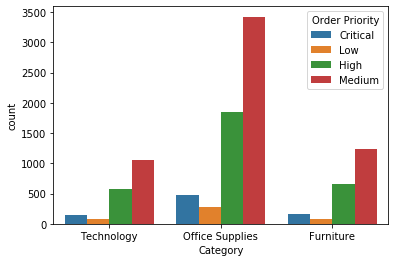

In [39]:
sns.countplot(data_USA["Category"],hue=data_USA["Order Priority"])


Now I will createa sub-database of the consumer merket of the USA. I will study this dataset with a greater focus on the numeric information that we can obtain from it.

In [40]:
USA_consumer=data_USA[data_USA.Segment=="Consumer"]


I will start analyzing the existing correlations between this numeric data.

The first thing I notice is that the "Sales" and the "shipping Cost" have a clear correlation.

That makes a lot of sense, since, as we said before, the more this business sells, the more cost of shipping it will have. 

I assume that there is not a direct correlation because the costs of shipping vary depending on the product and category. 

At the same time, the Sales and the profit, have weak correlation because, as we have seen before, even though a lot of products are so profitable, this business also sells assets that are not profitable at all. 

                  Sales  Quantity  Discount    Profit  Shipping Cost
Sales          1.000000  0.216487 -0.027593  0.496210       0.724714
Quantity       0.216487  1.000000 -0.008467  0.059117       0.216217
Discount      -0.027593 -0.008467  1.000000 -0.214766      -0.016336
Profit         0.496210  0.059117 -0.214766  1.000000       0.234595
Shipping Cost  0.724714  0.216217 -0.016336  0.234595       1.000000


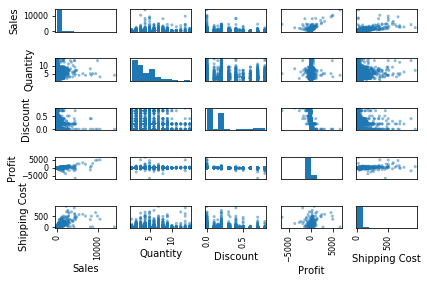

In [41]:
axes = pd.plotting.scatter_matrix(USA_consumer.iloc[:,18:23])
plt.tight_layout()

print(USA_consumer.iloc[:,18:23].corr())

This next plot, confirms that there is a relation between the Sales and the Shipping Costs. 

However, it is possible to see that the different “Order Priorities” conform very distinct groups. The “Critical Priority” (the orange one), has a cost that grows in a very pronounced way and at the same time the “Medium Priority” (the purple one), can ship the products for a more affordable price.

This clear differences between groups of data, makes me think that if we divide this data in the different "Order Priority" groups, their correlations with the Sales will be much more clear.

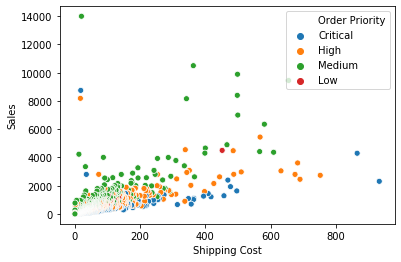

In [42]:
sns.scatterplot(USA_consumer['Shipping Cost'],USA_consumer.Sales,hue=USA_consumer['Order Priority'])
plt.show()